In [1]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze
from utils import plot_policy, plot_values, test_agent, plot_action_values

pygame 2.1.2 (SDL 2.0.18, Python 3.8.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
env = Maze()

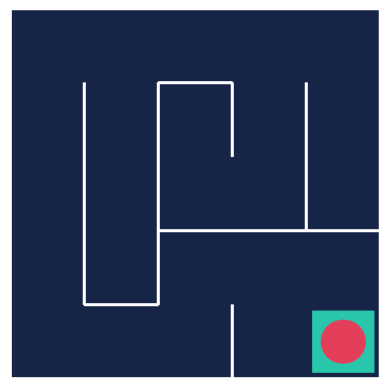

In [3]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.imshow(frame)

In [6]:
action_values = np.full((5,5,4),-100)
action_values[4,4,:]=0.

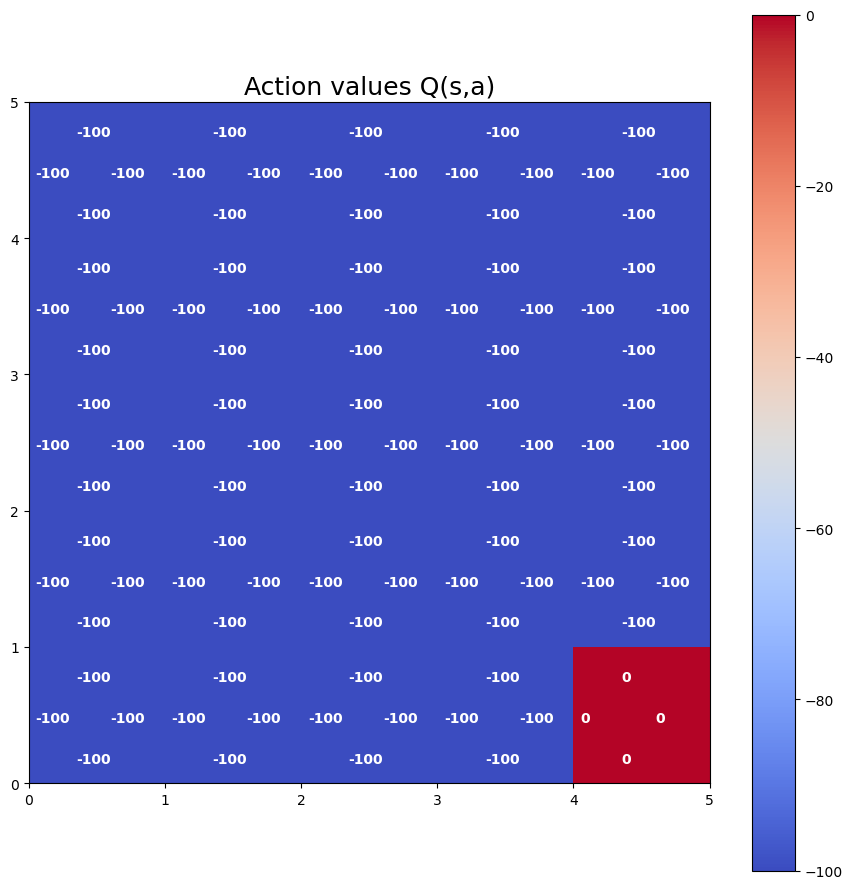

In [7]:
plot_action_values(action_values)

In [8]:
def target_policy(state):
    av = action_values[state]
    return np.random.choice(np.flatnonzero(av == av.max()))

In [9]:
action = target_policy((0,0))
action

2

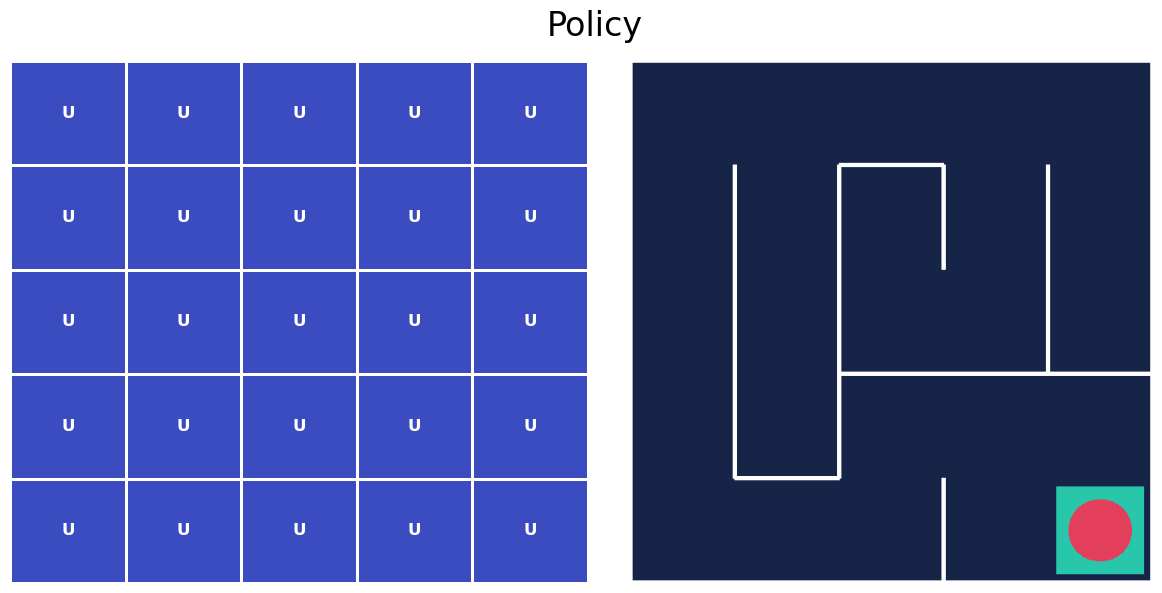

In [10]:
plot_policy(action_values, frame)

In [17]:
def exploratory_policy(state: tuple, epsilon: float = 0.) -> int:
    if np.random.random() < epsilon:
        return np.random.choice(4)
    else:
        av = action_values[state]
        return np.random.choice(np.flatnonzero(av == av.max()))

In [16]:
action = exploratory_policy((0,0), epsilon=0.5)
action

3

In [18]:
def off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes, gamma=0.99, epsilon=0.2):
    csa = np.zeros((5,5,4))
    for episode in range(1,episodes+1):
        G = 0
        W = 1
        state = env.reset()
        done = False
        transitions = []

        while not done:
            action = exploratory_policy(state, epsilon)
            next_state, reward, done, _ = env.step(action)
            transitions.append([state, action, reward])
            state = next_state

        for state_t, action_t, reward_t in reversed(transitions):
            G = reward_t + gamma * G
            csa[state_t][action_t] += W
            qsa = action_values[state_t][action_t]
            action_values[state_t][action_t] += (W/csa[state_t][action_t]) * (G-qsa)

            if action_t != target_policy(state_t):
                break
            W = W * 1./(1-epsilon+epsilon/4)



In [19]:
off_policy_mc_control(action_values, target_policy, exploratory_policy, episodes=1000, epsilon=0.3)

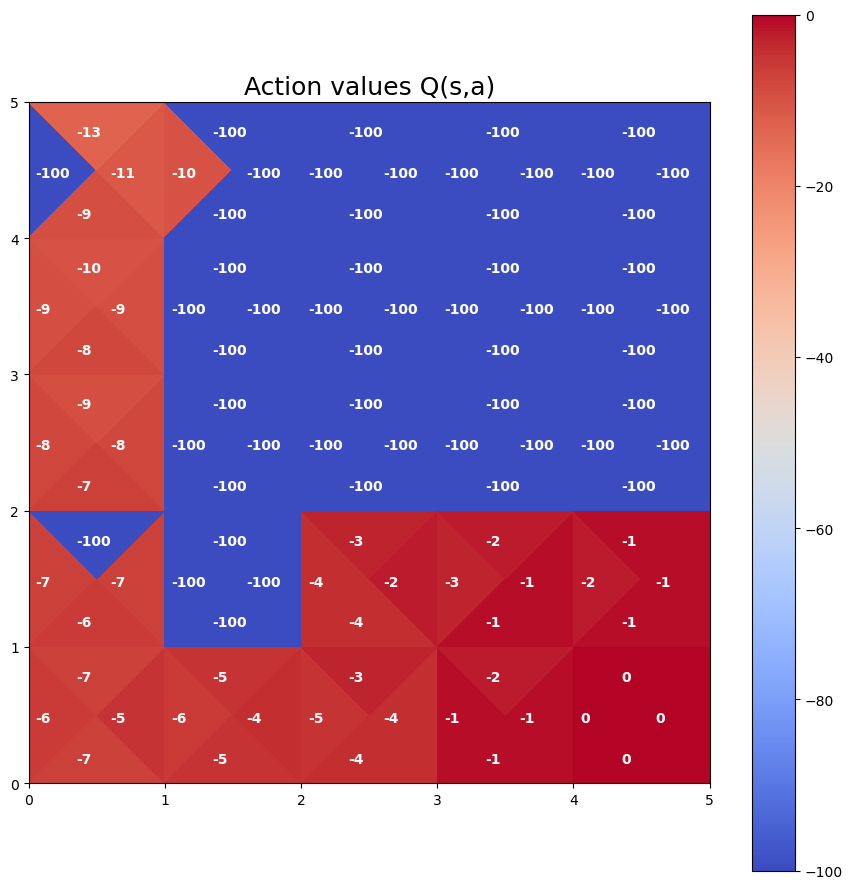

In [20]:
plot_action_values(action_values)

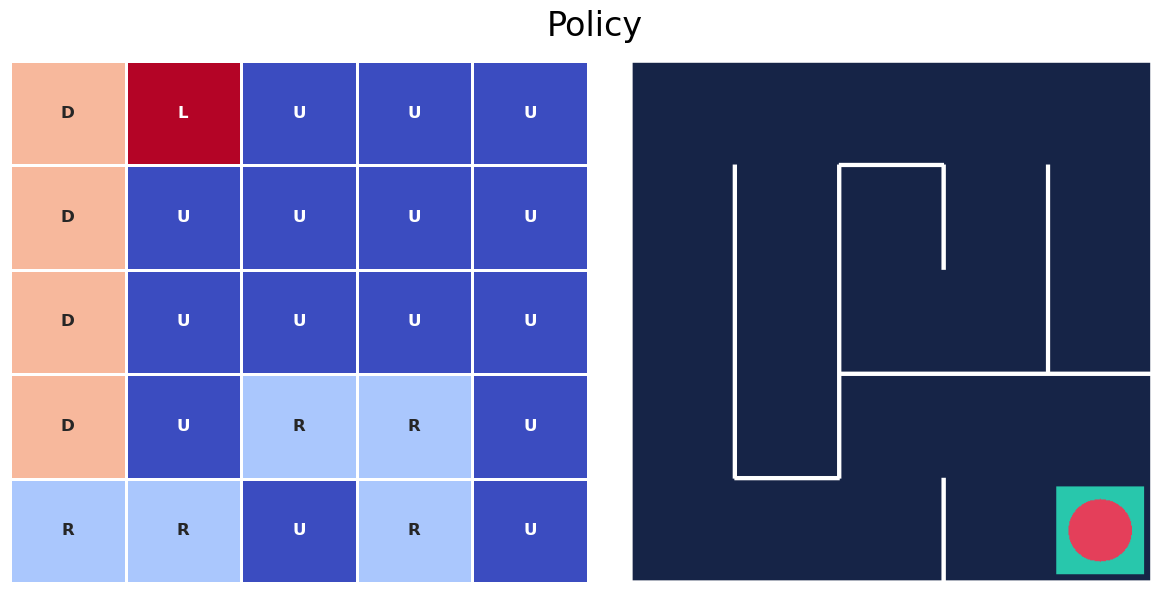

In [21]:
plot_policy(action_values, frame)

KeyboardInterrupt: 

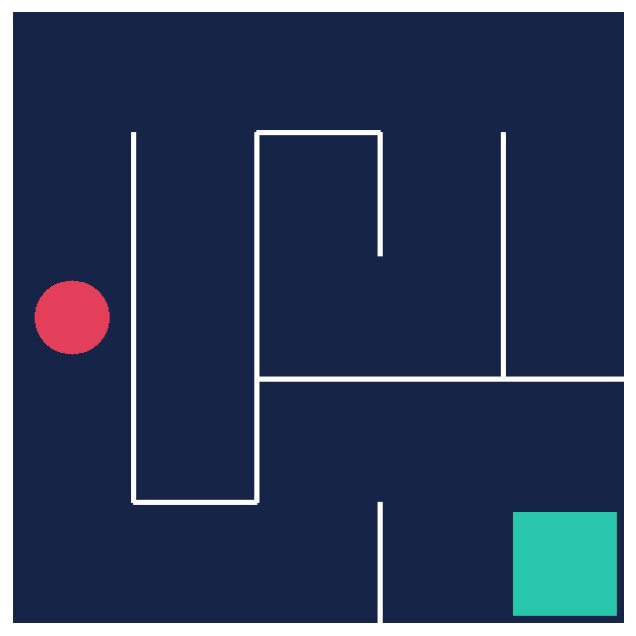

In [22]:
test_agent(env, target_policy)